In [145]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


def cross_validated(data,fold):
    n = len(data)//fold
    for _ in range(fold):
        pass

def generate_custom_sine_wave(num_points,seed,noise=0):
    random.seed(seed)
    x = [random.uniform(-1,1) for _ in range(num_points)]
    # y = [np.sin(np.pi * i) for i in x]
    
    y = [np.sin(np.pi * i)+np.random.normal(0,noise,1)[0] for i in x]
    xy = [[x[i],y[i]] for i in range(num_points)]
    return xy

def rmse(coef,xy):
    data = []
    for i in xy:
        y_hat = 0
        for j in range(len(coef)):
            y_hat += coef.item(j)*i[0]**(j)
        rse = (y_hat-i[1])**2
        data.append(rse)
    return (sum(data)/(len(data)))**(1/2)

def normal_eq(xy,degree):
    xn = [i[0] for i in xy]
    yn = [i[1] for i in xy]
    x_mat = []  
    for i in range(degree+1):
        x_mat.append([x**i for x in xn])
    cmx = np.matrix(x_mat).transpose()
    my = np.matrix(yn).transpose()
    xT = cmx.transpose()
    coef = ((xT*cmx)**-1)*(xT*my)
    return coef

def rmse_calculator(train,test,degree):
    coef = normal_eq(train,degree)
    result = rmse(coef,test)
    return result



0.0


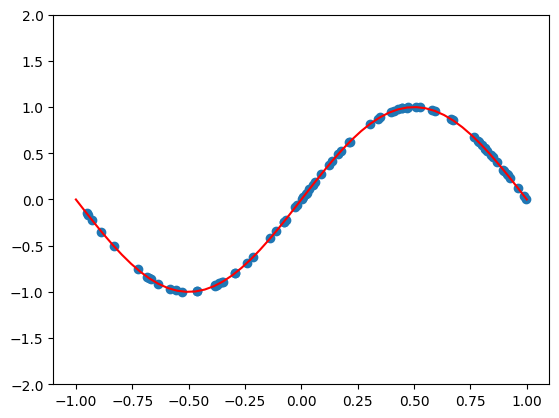

In [163]:
xy = generate_custom_sine_wave(80,2)
x_arr = [i[0] for i in xy]
y_arr = [i[1] for i in xy]
plt.scatter(x_arr,y_arr)

coef = normal_eq(xy,9)

def yl(x,coef):
    yl = []
    for i in x:
        y = 0
        for j in range(len(coef)):
            y += coef.item(j)*i**(j)
        yl.append(y)
    return yl
print(round(rmse(coef,xy),4))
# y = 0
# x = sym.symbols('x')
# for i in range(len(coef)):
#     y += coef.item(i)*x**(i)
# print(sym.simplify(y))
lix = list(np.linspace(-1,1))
# liy = [y.subs([(x,i)]) for i in lix]
liy = yl(lix,coef)
plt.ylim([-2,2])
plt.plot(lix,liy,color ='red')
plt.show()
